In [ ]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Is this notebook running on Colab or Kaggle?
IS_COLAB = "google.colab" in sys.modules
IS_KAGGLE = "kaggle_secrets" in sys.modules

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "classification"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [ ]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'DESCR', 'details', 'categories', 'url'])

In [ ]:
X, y = mnist["data"], mnist["target"]
X.shape

(70000, 784)

[[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   3.  18.
   18.  18. 126. 136. 175.  26. 166. 255. 247. 127.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.  30.  36.  94. 154. 170. 253.
  253. 253. 253. 253. 225. 172. 253. 242. 195.  64.   0.  

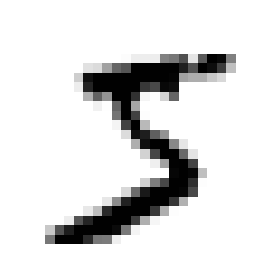

In [ ]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

some_digit = X[0]  # 1 by 28*28
some_digit_image = some_digit.reshape(28, 28)
print(some_digit_image)
plt.imshow(some_digit_image, cmap = mpl.cm.binary)
plt.axis("off")

save_fig("some_digit_plot")
plt.show()

In [ ]:
y[0]

'5'

In [ ]:
y = y.astype(np.uint8) # datatype을 uint(0을 포함한 양의 정수), 숫자는 bit 수, ex)8 = 2*8,, 0~255 

In [ ]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

# MNIST는 test, train set이 구분 되어 있음, 또 train_set은 이미 섞여 있음

In [ ]:
#s binary_classifier 
y_train_5 = (y_train == 5) # if y_train = 5, y_train_5 = True, else return False
y_test_5 = (y_test == 5)


In [ ]:
# 확률적 경사 하강법(SGD), Stochastic Gradient Descent
# 매우 큰 dataset을 효율적으로 처리함(train sample을 하니씩 독립적으로 처리하기 떄문)
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state = 42) # SGD는 확률적으로 샘플 취하기에 결과를 반복하려면 randome_state를 정해줘야해
sgd_clf.fit(X_train, y_train_5)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
sgd_clf.predict([some_digit])

array([ True])

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone
#clone: Constructs a new unfitted estimator with the same parameters.
# StraitfiedKFold: 계층적 샘플링하는 것
skfolds = StratifiedKFold(n_splits = 3, random_state = 42, shuffle = True)

# train_set로 3 KFold 해주는 
for train_index, test_index in skfolds.split(X_train, y_train_5):
  clone_cf = clone(sgd_clf)
  print('accuracy')
  X_train_folds = X_train[train_index]
  y_train_folds = y_train_5[train_index]
  X_test_fold = X_train[test_index]
  y_test_fold = y_train_5[test_index]

  clone_cf.fit(X_train_folds, y_train_folds)
  y_pred = clone_cf.predict(X_test_fold)
  n_correct = sum(y_pred == y_test_fold)
  print(n_correct/len(y_pred))
  
 

accuracy
0.9669
accuracy
0.91625
accuracy
0.96785


In [ ]:
# Let's use the function to evaluate ourmodel SGDClassifier, using K-fold cross-validation with three folds
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf,X_train, y_train_5, cv = 3, scoring = 'accuracy')

array([0.95035, 0.96035, 0.9604 ])

In [ ]:
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
  def fit(self,X,y = None):
    return self
  def predict(self,X):
    return np.zeros((len(X),1),dtype = bool)


In [ ]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.91125, 0.90855, 0.90915])

In [ ]:
# 이미지의 10%정도만 5여서 무조건 5아니다라고만 예측해도 정확도가 90임
#이렇듯 불균형적인 데이터를 다룰때는 다른 개념의 정확도가 필요함

In [ ]:
#confusion matrix
# 분류기의 성능을 평가하는 더 좋은 지표가된다. 
# 클래스 A의 샘플이 클래스 B로 분류된 횟수를 세는 것
# 실제 타깃값과 예측값이 필요함(test set은 마지막에 사용되기에 cross_val_predict을 이용)

In [ ]:
#cross_val_predict k겹 교차 검증을 수횅하는데 평가 점수를 반환하지 않고, 각 테스트 폴드에서 얻은 예측값을 반환
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf,X_train,y_train_5, cv = 3) 

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)
# raw: real class, column: predict class,
# 1raw is negative class,, [0,0] 53892개를 실제 5아닌데 5 아님으로 분류,(true negative)
# [0,1] 는 687개를 5가아닌데 5라고 분류한 것 false positive
# 2raw is positive class, [1,0] 1891개를 실제 5인데 5아니라고 분류한것 (false negative) 
#[1,1] 3530개를 실제 5인데 5라고 분류한 것 (true positive)
 

array([[53892,   687],
       [ 1891,  3530]])

In [ ]:
# precision(정밀도) = TP/(TP+FP) 양성으로 예측한것중에 실제 양성인 것의 비율
# Recall(재현율) = TP/TP+FN (양성예측 맞은것/real 양성 ),, 분류기가 정확하게 감지한 양성 샘플의 비율 = sensitivity = true positive rate(TPR)

from sklearn.metrics import precision_score, recall_score
print(precision_score(y_train_5, y_train_pred))
print(3530/(687+3530)) 

0.8370879772350012
0.8370879772350012


In [ ]:
print(recall_score(y_train_5, y_train_pred))
print(3530/(1891+3530))

0.6511713705958311
0.6511713705958311


In [ ]:
#F1score = 2/((1/precision)+(1/recall))
# F1score is harmonic mean of precisiom and recall
from sklearn.metrics import f1_score
f1_score(y_train_5,y_train_pred)

0.7325171197343846

In [ ]:
# Unfortunately, you can't have it both ways: increasing precision reduces recall and vice versa. 
# This is called the precision/recall trade-off
# SFDClassifier는 dicision function을 사용하는데, decision threshold에 따라서 pecision과 recall 값이 달라짐
# decision threshold가 높아지면 prescion이 높아짐, 대신에 점수가 낮은 5를 5가 아니라고 분류할 수 있음 recall이 낮아짐
# decision threshold가 높아지면 점수가 낮은 5도 5가 분류 가능하기에 recall은 높아짐, 대신에 점수가 높은 다른 숫자도 5라고 
# 분류되기에 precision이 낮아짐

In [ ]:
# sklearn에서는 decision_function() method를 이용하면 각 샘플의 점수를 호출 할수 있음
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([2164.22030239])

In [ ]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([ True])

In [ ]:
threshold = 8000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

In [ ]:
# 적절한 임계값 설정하기,
# 먼저 cross_val_predict()으로 모든 샘플의 결정점수를 구한다.
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv = 3, method ='decision_function')


In [ ]:
# precision_recall_curve()를 사용하여 가능한 모든 임곅밧에 대해 정밀도와 재현율을 계산할 수 있습니다.

from sklearn.metrics import precision_recall_curve
#  train set이랑 disicion score를 넣어주면 됨
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)
print(precisions)

[0.09040123 0.09038606 0.09038757 ... 1.         1.         1.        ]


Saving figure precision_recall_vs_threshold_plot


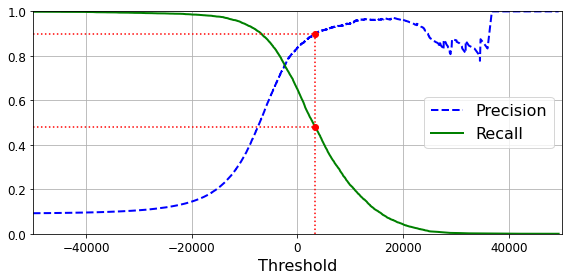

In [ ]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.legend(loc="center right", fontsize=16) # Not shown in the book
    plt.xlabel("Threshold", fontsize=16)        # Not shown
    plt.grid(True)                              # Not shown
    plt.axis([-50000, 50000, 0, 1])             # Not shown



recall_90_precision = recalls[np.argmax(precisions >= 0.90)]
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]


plt.figure(figsize=(8, 4))                                                                  # Not shown
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.plot([threshold_90_precision, threshold_90_precision], [0., 0.9], "r:")                 # Not shown
plt.plot([-50000, threshold_90_precision], [0.9, 0.9], "r:")                                # Not shown
plt.plot([-50000, threshold_90_precision], [recall_90_precision, recall_90_precision], "r:")# Not shown
plt.plot([threshold_90_precision], [0.9], "ro")                                             # Not shown
plt.plot([threshold_90_precision], [recall_90_precision], "ro")                             # Not shown
save_fig("precision_recall_vs_threshold_plot")                                              # Not shown
plt.show()

In [ ]:
# Another way to select a good precision/recall trade off is to plot presicion directly aginst recall

Saving figure precision_vs_recall_plot


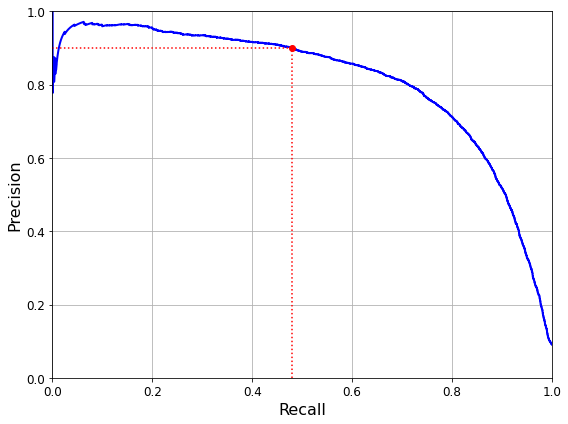

In [ ]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])
    plt.grid(True)

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
plt.plot([recall_90_precision, recall_90_precision], [0., 0.9], "r:")
plt.plot([0.0, recall_90_precision], [0.9, 0.9], "r:")
plt.plot([recall_90_precision], [0.9], "ro")
save_fig("precision_vs_recall_plot")
plt.show()

In [ ]:
# precision 90 이상나오는 임계점 중 가장 작은 값을 찾아보자
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]
print(threshold_90_precision)

3370.0194991439557


In [ ]:
y_train_pred_90 = (y_scores >= threshold_90_precision)

p1 = precision_score(y_train_5,y_train_pred_90)
r1 = recall_score(y_train_5,y_train_pred_90)
print(p1)
print(r1)

0.9000345901072293
0.4799852425751706


The ROC Curve

The receiver operating characteristic(ROC) curve is anthoer common tool used with binary classifiers.
ROC curve plots the true positive rate(recall) aginst the false positive rate(FPR),
FPR은 음성인데 양성으로 잘못 예측한 비율



In [ ]:

from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

Saving figure roc_curve_plot


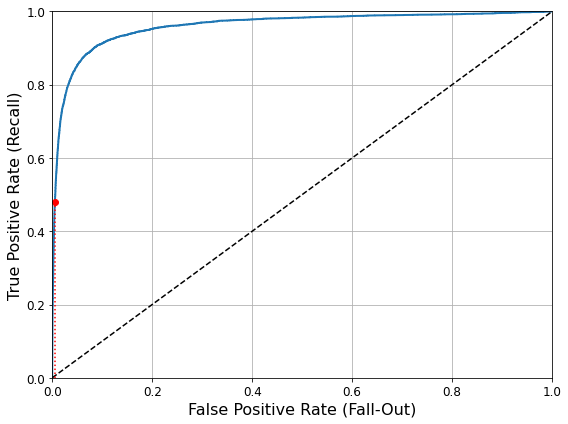

In [ ]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.axis([0, 1, 0, 1])                                    # Not shown in the book
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) # Not shown
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    # Not shown
    plt.grid(True)                                            # Not shown

plt.figure(figsize=(8, 6))                                    # Not shown
plot_roc_curve(fpr, tpr)
fpr_90 = fpr[np.argmax(tpr >= recall_90_precision)]           # Not shown
plt.plot([fpr_90, fpr_90], [0., recall_90_precision], "r:")   # Not shown
plt.plot([0.0, fpr_90], [recall_90_precision, recall_90_precision], "r:")  # Not shown
plt.plot([fpr_90], [recall_90_precision], "ro")               # Not shown
save_fig("roc_curve_plot")                                    # Not shown
uplt.show()

In [ ]:
# FPR이 일때 TPR이 1이어야 이상적인 분류기
# 곡선 아래의 면적을 계산해서 1에 가까울 수록 이상적인 분류기로 볼 수 있음
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)

0.9604938554008616

In [ ]:
# positive class 가 드물거나, fale negative(양성인데 음성이로예측한 경우)보다 false positive(음성인데 양성으로 얘측한 경우)가 중요할 때
# PR곡선을 사용, 그렇지 않으면 ROC곡선을 사용. 앞의 ROC곡선의 AUC 점수는 매우 높은 것은 negative의 양이 많아서 FPR이 매우 낮게 나오기 때문
# 반면 PR curve는 분류기의 성능 개선 여지가 얼마나 되는지 잘 보여줌

In [ ]:
# RandomForestClassifier를 훈련시켜, SGDClassfier의 ROC곡선과 roc_curve 점수를 비교해보자
# sklearn 분류기는 일반적은로 predict_proba(), decision_function() 두 메서드가 있음 
# predict_proba() 메서드는 sample이 raw, class가 column, sample이 주어진 class에 속할 확률을 담은 배열을 반환함

0.02


In [ ]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state = 42)
y_probas_forest = cross_val_predict(forest_clf,X_train, y_train_5, cv = 3, method = 'predict_proba')

In [ ]:
print(y_probas_forest)

[[0.11 0.89]
 [0.99 0.01]
 [0.96 0.04]
 ...
 [0.02 0.98]
 [0.92 0.08]
 [0.94 0.06]]


In [ ]:
y_scores_forest = y_probas_forest[:,1] # positive class에 대한 확률을 점수로 사용하자.
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5, y_scores_forest)

Saving figure roc_curve_comparison_plot


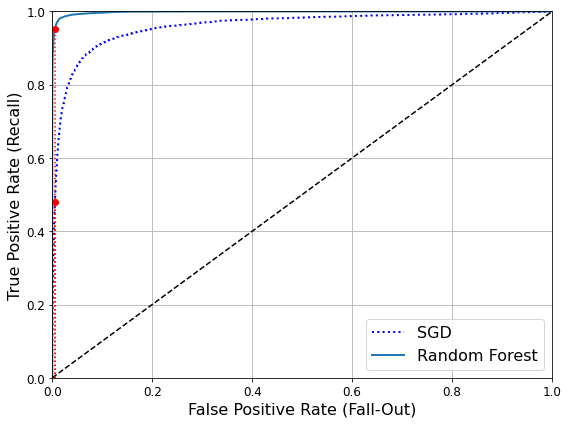

In [ ]:
recall_for_forest = tpr_forest[np.argmax(fpr_forest >= fpr_90)]

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, "b:", linewidth=2, label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.plot([fpr_90, fpr_90], [0., recall_90_precision], "r:")
plt.plot([0.0, fpr_90], [recall_90_precision, recall_90_precision], "r:")
plt.plot([fpr_90], [recall_90_precision], "ro")
plt.plot([fpr_90, fpr_90], [0., recall_for_forest], "r:")
plt.plot([fpr_90], [recall_for_forest], "ro")
plt.grid(True)
plt.legend(loc="lower right", fontsize=16)
save_fig("roc_curve_comparison_plot")
plt.show()

In [ ]:
roc_auc_score(y_train_5, y_scores_forest)

0.9983436731328145

In [ ]:
#분류기를 훈련시키는 방법과 작업에 맞는 적절한 지표 선택, 교차 검증을 사용한 평가, 요구 사항에 맞는 정밀도/재현율 트레이트오프 선택,
# ROC 곡선과 ROC AUC점수를 사용한 여러 모댈의 비교를 해보았음 ㅎㅎ